In [1]:
# Importación de librerías de trabajo

import os # Administrar directorio de trabajo
import numpy as np # Trabaja con arreglos
import pandas as pd # Trabajar con DF
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos    

In [24]:
os.chdir('C:/Users/Julian/Desktop/Cursos/Cursos Github/Metodos_estadisticos')
os.getcwd()
os.listdir()

['.git', 'Data sets', 'Project GEIH 23', 'README.md']

In [4]:
df = pd.read_csv('Data sets/gen_23.csv')

In [5]:
df.shape

(860802, 18)

In [27]:
df.columns

Index(['PRIMARY_KEY', 'MES', 'CLASE', 'FEX_C18', 'DPTO', 'SEXO', 'EDAD',
       'CAMPESINO', 'CULTURA', 'EST_CIVIL', 'LEE', 'NIVEL_EDUC', 'EDUC',
       'ATRACCIÓN'],
      dtype='object')

In [7]:
df.sample(5)

,Unnamed: 0,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,MES,CLASE,FEX_C18,DPTO,P3271,P6040,P2057,P6080,P6070,P6160,P3042,P3042S1,P3038
343360,343361,7360413,1,2,1,2,2,1426.758784,20,1,30,1,5,3.0,1.0,4.0,4.0,2.0
65448,65449,7422209,1,2,1,4,1,307.504734,41,2,41,2,6,3.0,1.0,10.0,10.0,1.0
545518,545519,7383023,1,2,1,3,1,329.613628,85,2,25,2,6,2.0,1.0,9.0,5.0,1.0
825059,825060,7553216,1,1,1,9,2,1203.811540,27,1,34,1,6,2.0,1.0,3.0,5.0,2.0
451732,451733,7460563,1,1,1,6,1,127.289305,18,1,43,2,6,2.0,1.0,8.0,4.0,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860802 entries, 0 to 860801
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   860802 non-null  int64  
 1   DIRECTORIO   860802 non-null  int64  
 2   SECUENCIA_P  860802 non-null  int64  
 3   ORDEN        860802 non-null  int64  
 4   HOGAR        860802 non-null  int64  
 5   MES          860802 non-null  int64  
 6   CLASE        860802 non-null  int64  
 7   FEX_C18      860802 non-null  float64
 8   DPTO         860802 non-null  int64  
 9   P3271        860802 non-null  int64  
 10  P6040        860802 non-null  int64  
 11  P2057        860802 non-null  int64  
 12  P6080        860802 non-null  int64  
 13  P6070        743034 non-null  float64
 14  P6160        831109 non-null  float64
 15  P3042        831109 non-null  float64
 16  P3042S1      831109 non-null  float64
 17  P3038        631485 non-null  float64
dtypes: float64(6), int64(12)

# Data cleaning 

1. Columnas irrelevantes
1. Datos faltantes
1. Presentación de los datos (categorizar, codificar)
1. Errores tipográficos
1. Outliers y extremes liers

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
# Creemos primary key

df['PRIMARY_KEY'] = df.DIRECTORIO.astype(str) + '-' + df.SECUENCIA_P.astype(str) + '-' + df.ORDEN.astype(str) + '-' + df.HOGAR.astype(str)

In [11]:
df.sample()

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,MES,CLASE,FEX_C18,DPTO,P3271,P6040,P2057,P6080,P6070,P6160,P3042,P3042S1,P3038,PRIMARY_KEY
201846,7650965,1,1,1,12,1,1019.507714,17,1,73,2,6,3.0,1.0,10.0,10.0,2.0,7650965-1-1-1


In [12]:
df = df[['PRIMARY_KEY','MES', 'CLASE','FEX_C18', 'DPTO', 'P3271', 'P6040', 'P2057', 'P6080', 'P6070', 'P6160','P3042', 'P3042S1', 'P3038',]]

In [13]:
df.sample(5)

,PRIMARY_KEY,MES,CLASE,FEX_C18,DPTO,P3271,P6040,P2057,P6080,P6070,P6160,P3042,P3042S1,P3038
618989,7441064-1-3-1,5,1,79.818129,18,2,22,2,6,6.0,1.0,10.0,9.0,1.0
560069,7388763-1-1-1,3,1,39.708992,27,1,20,1,5,6.0,1.0,10.0,4.0,2.0
375036,7487171-1-1-1,7,1,488.034375,85,1,59,1,6,4.0,1.0,12.0,4.0,2.0
638897,7448655-1-1-1,5,1,351.350948,73,1,52,2,6,2.0,1.0,3.0,5.0,2.0
505895,7367627-1-1-1,3,1,626.514375,13,1,58,2,6,3.0,1.0,5.0,2.0,2.0


In [14]:
df.columns  = ['PRIMARY_KEY', 'MES', 'CLASE','FEX_C18', 'DPTO','SEXO','EDAD','CAMPESINO','CULTURA','EST_CIVIL','LEE','NIVEL_EDUC','EDUC','ATRACCIÓN']

In [15]:
df.sample(5)

,PRIMARY_KEY,MES,CLASE,FEX_C18,DPTO,SEXO,EDAD,CAMPESINO,CULTURA,EST_CIVIL,LEE,NIVEL_EDUC,EDUC,ATRACCIÓN
181716,7642840-1-4-1,12,1,378.534216,13,1,13,2,6,6.0,1.0,4.0,3.0,NaN
11443,7400726-1-3-1,4,1,194.485487,66,2,21,2,6,6.0,1.0,6.0,2.0,1.0
474097,7469343-1-1-1,6,1,183.628222,52,1,63,2,5,4.0,1.0,3.0,3.0,2.0
284267,7337151-1-1-1,1,1,106.150411,70,2,47,2,6,2.0,1.0,12.0,4.0,1.0
194741,7648047-1-1-1,12,1,174.193194,17,1,68,2,6,2.0,1.0,8.0,4.0,2.0


In [28]:
df.SEXO = df.SEXO.replace({1: 'Hombre',2: 'Mujer'})

In [29]:
# Crear diccionario de departamentos
diccionario_dpto = {
    5: 'Antioquia',
    8: 'Atlántico',
    11: 'Bogotá',
    13: 'Bolívar',
    15: 'Boyacá',
    17: 'Caldas',
    18: 'Caquetá',
    19: 'Cauca',
    20: 'Cesar',
    23: 'Córdoba',
    25: 'Cundinamarca',
    27: 'Chocó',
    41: 'Huila',
    44: 'La Guajira',
    47: 'Magdalena',
    50: 'Meta',
    52: 'Nariño',
    54: 'Norte de Santander',
    63: 'Quindio',
    66: 'Risaralda',
    68: 'Santander',
    70: 'Sucre',
    73: 'Tolima',
    76: 'Valle del Cauca'
}

df['DPTO'] = df['DPTO'].replace(diccionario_dpto)

In [30]:
diccionario_est_civ = {
    1: 'Pareja < 2',
    2: 'Pareja >= 2',
    3: 'Casado',
    4: 'Separado',
    5: 'Viudo',
    6: 'Soltero'
}
df['EST_CIVIL'] = df['EST_CIVIL'].replace(diccionario_est_civ)

In [31]:
diccionario_meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

df['MES'] = df['MES'].replace(diccionario_meses)

In [32]:
df.sample(5)

,PRIMARY_KEY,MES,CLASE,FEX_C18,DPTO,SEXO,EDAD,CAMPESINO,CULTURA,EST_CIVIL,LEE,NIVEL_EDUC,EDUC,ATRACCIÓN
115992,7527735-1-3-1,agosto,2,1291.184740,Cundinamarca,Hombre,18,1,6,Soltero,1.0,10.0,3.0,2.0
170897,7638460-1-4-1,diciembre,1,266.548133,Huila,Mujer,13,2,6,Soltero,1.0,4.0,2.0,NaN
64838,7421981-1-2-1,abril,1,116.058444,Córdoba,Mujer,37,2,6,Pareja >= 2,1.0,5.0,2.0,1.0
133313,7534501-1-6-1,agosto,1,977.250187,Meta,Hombre,8,2,6,NaN,1.0,3.0,2.0,NaN
387711,7492222-1-2-1,julio,1,207.915045,Magdalena,Mujer,48,2,6,Pareja >= 2,1.0,5.0,2.0,1.0


In [36]:
# Validación de datos faltantes

df.isna().sum()

PRIMARY_KEY         0
MES                 0
CLASE               0
FEX_C18             0
DPTO                0
SEXO                0
EDAD                0
CAMPESINO           0
CULTURA             0
EST_CIVIL      117768
LEE             29693
NIVEL_EDUC      29693
EDUC            29693
ATRACCIÓN      229317
dtype: int64

In [37]:
# Elimaré la variable atracción

df.drop('ATRACCIÓN',axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860802 entries, 0 to 860801
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PRIMARY_KEY  860802 non-null  object 
 1   MES          860802 non-null  object 
 2   CLASE        860802 non-null  int64  
 3   FEX_C18      860802 non-null  float64
 4   DPTO         860802 non-null  object 
 5   SEXO         860802 non-null  object 
 6   EDAD         860802 non-null  int64  
 7   CAMPESINO    860802 non-null  int64  
 8   CULTURA      860802 non-null  int64  
 9   EST_CIVIL    743034 non-null  object 
 10  LEE          831109 non-null  float64
 11  NIVEL_EDUC   831109 non-null  float64
 12  EDUC         831109 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 85.4+ MB


In [46]:
df.SEXO.value_counts(normalize=True) * 100 #Frecuencia absoluta (fi) y relativa (ni)
53.205499 / 46.794501

1.137003234632206

C:\Users\Julian\AppData\Local\Temp\ipykernel_16124\63727334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='MES',palette='Set3')


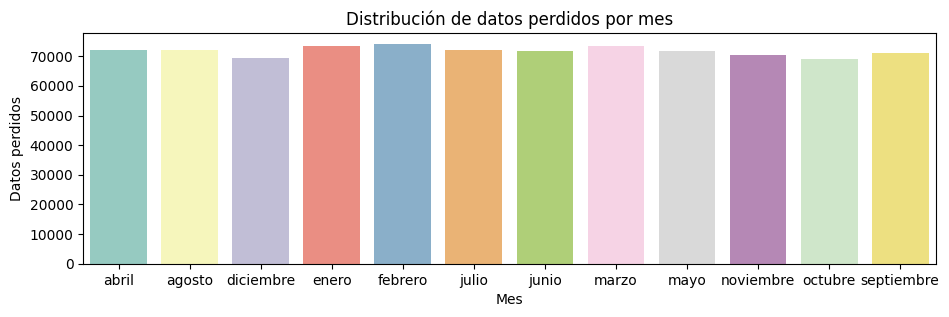

In [47]:
# Qué hacer con los datos perdidos
# 1. Métodos de imputación de datos
# 2. Eliminación de datos

# Cómo se distribuyen los NA a través de los meses

plt.figure(figsize=(11,3))
sns.countplot(data=df,x='MES',palette='Set3')
plt.xlabel('Mes')
plt.ylabel('Datos perdidos')
plt.title('Distribución de datos perdidos por mes')
plt.show()

In [50]:
df['FALTANTES'] = df.isna().any(axis=1)

In [51]:
df.groupby('MES')['FALTANTES'].sum()

MES
abril          9970
agosto         9775
diciembre      9375
enero         10251
febrero       10212
julio          9722
junio         10161
marzo         10066
mayo           9785
noviembre      9516
octubre        9311
septiembre     9624
Name: FALTANTES, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860802 entries, 0 to 860801
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PRIMARY_KEY  860802 non-null  object 
 1   MES          860802 non-null  object 
 2   CLASE        860802 non-null  int64  
 3   FEX_C18      860802 non-null  float64
 4   DPTO         860802 non-null  object 
 5   SEXO         860802 non-null  object 
 6   EDAD         860802 non-null  int64  
 7   CAMPESINO    860802 non-null  int64  
 8   CULTURA      860802 non-null  int64  
 9   EST_CIVIL    743034 non-null  object 
 10  LEE          831109 non-null  float64
 11  NIVEL_EDUC   831109 non-null  float64
 12  EDUC         831109 non-null  float64
 13  FALTANTES    860802 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(5)
memory usage: 86.2+ MB


In [56]:
100 * (860802 - 831109) / 860802 #porcentaje de datos perdidos (recomendación: no supere el 1%)

df.dropna(subset=['NIVEL_EDUC'],inplace=True)

In [57]:
df.isna().sum()

PRIMARY_KEY        0
MES                0
CLASE              0
FEX_C18            0
DPTO               0
SEXO               0
EDAD               0
CAMPESINO          0
CULTURA            0
EST_CIVIL      88075
LEE                0
NIVEL_EDUC         0
EDUC               0
FALTANTES          0
dtype: int64

In [64]:
min(df.EDAD), max(df.EDAD)

len(df[df.EDAD > 100])

92

In [66]:
min(df.NIVEL_EDUC ), max(df.NIVEL_EDUC )

len(df[df.NIVEL_EDUC == 99])

25

## Exploración de variables cualitativas

In [72]:
freq_sex = df.SEXO.value_counts(normalize=True)
etiquetas = freq_sex.index

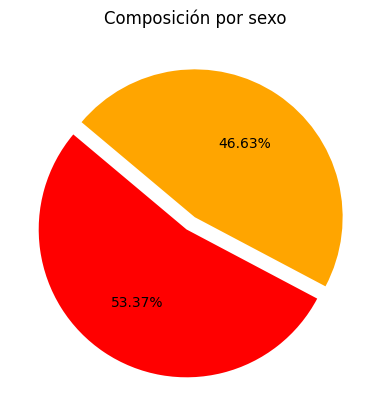

In [80]:
plt.pie(freq_sex,explode=(0.1,0),autopct= '%1.2f%%',colors=['red','orange'],startangle=140)
plt.title('Composición por sexo')
plt.show()

In [83]:
df.DPTO.value_counts(normalize=True) * 100

DPTO
Antioquia             5.905844
Valle del Cauca       5.197032
Santander             4.812485
Caldas                4.662926
Bolívar               4.556683
Atlántico             4.505306
Risaralda             4.354303
Nariño                4.287043
Magdalena             4.253714
Norte de Santander    3.994302
Sucre                 3.975411
Meta                  3.898526
La Guajira            3.840772
Chocó                 3.788071
Cesar                 3.661975
Cauca                 3.649341
Quindio               3.631172
Huila                 3.436974
Boyacá                3.335423
Caquetá               3.319059
Córdoba               3.316653
Tolima                3.313765
Bogotá                3.087682
Cundinamarca          1.868828
88                    1.082169
81                    0.626392
97                    0.593544
85                    0.593424
91                    0.529172
94                    0.525924
95                    0.511004
86                    0.471057
99 

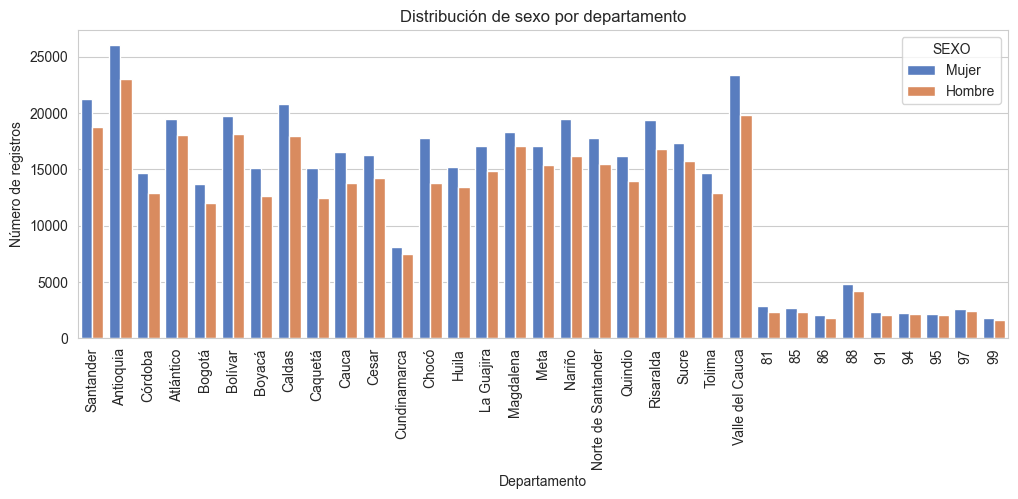

In [86]:
# Cruzar dos variables cualitativas

sns.set_style('whitegrid')

plt.figure(figsize=(12,4))
sns.countplot(x='DPTO',hue='SEXO',data=df,palette='muted',dodge=True)

plt.xlabel('Departamento')
plt.ylabel('Número de registros')
plt.title('Distribución de sexo por departamento')
plt.xticks(rotation = 'vertical')

plt.show()


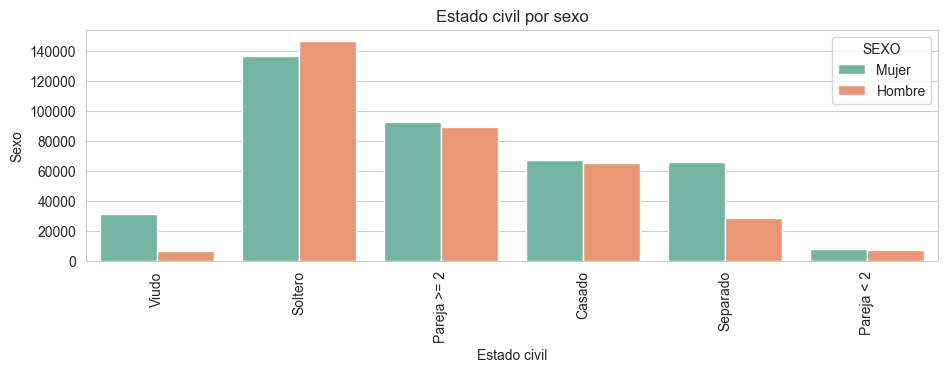

In [87]:
plt.figure(figsize=(11,3))

sns.countplot(x='EST_CIVIL',data=df, palette='Set2',hue='SEXO')
plt.title('Estado civil por sexo')
plt.xlabel('Estado civil')
plt.ylabel('Sexo')
plt.xticks(rotation = 'vertical')
plt.show()